In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

Loading Dataset

In [3]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


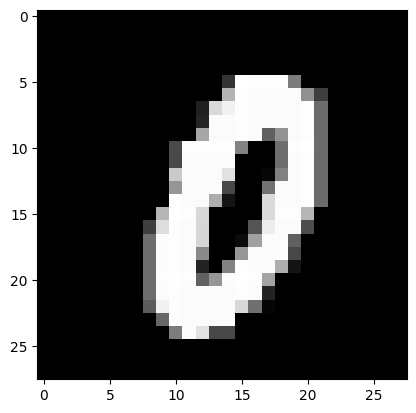

In [4]:
plt.imshow(x_train[34],cmap='gray')
plt.show()

In [5]:
x_train.shape

(60000, 28, 28)

preprocessing

In [6]:
x_train=x_train.reshape((-1,28,28,1)).astype('float32')/255
x_test=x_test.reshape((-1,28,28,1)).astype('float32')/255
x_train.shape

(60000, 28, 28, 1)

model definition

In [7]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 32)          0

In [8]:
hist=model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
235/235 [==============================] - 9s 16ms/step - loss: 0.4118 - accuracy: 0.8730 - val_loss: 0.1176 - val_accuracy: 0.9629
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1124 - accuracy: 0.9653 - val_loss: 0.0964 - val_accuracy: 0.9708
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0847 - accuracy: 0.9741 - val_loss: 0.0674 - val_accuracy: 0.9777
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0644 - accuracy: 0.9801 - val_loss: 0.0708 - val_accuracy: 0.9769
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0698 - val_accuracy: 0.9779
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0481 - val_accuracy: 0.9841
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0437 - val_accuracy: 0.9868

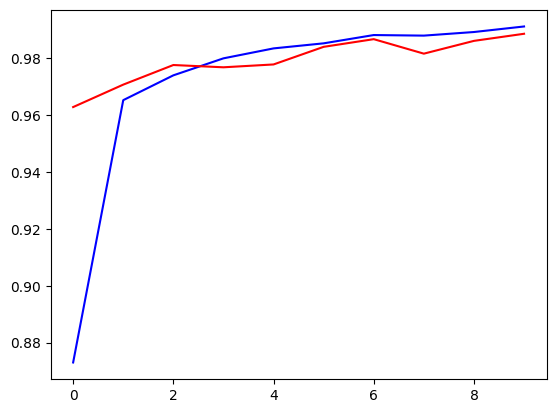

In [9]:
plt.plot(hist.history['accuracy'],color='blue')
plt.plot(hist.history['val_accuracy'],color='red')